# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data represents 17 campaigns between May 2008 and November 2010.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



"Job" can be represented with a dummy variable instead, since there is no unambiguous way to order the categories. Same with the "Marital". (re-represent these with integers instead of strings), 'contact', 'day_of_week', 'poutcome'.

"Educational" can be represented with an ordinal scale, in the order 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'university.degree', 'professional.course'. (re-represent these with integers instead of strings).

"default", "housing", "loan", can all be represented with an integer 1 or 0 instead of the strings 'yes' and 'no' respectively.

'duration' can most likely be left as is, however durations of 0 may have to be omitted.

The output variable should be converted to a binary integer or boolean as well.


Can consider dropping 'unknown' values from all categories if enough data entries will be left over afterwards, since these are clearly missing values.
The rest of the features can be left as is.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Business Objective:

The business objective of this task is to determine what type of clients will be more likely so subscribe to a term deposit, and what features of campaigns are better for convincing clients to subscribe. To do so, this task will compare different classification models to determine which method will best model the data and predict client subscriptions, then evaluate and adjust the best model based on is accuracy to understand what types of clients and campaigns will be most able to get subscriptions.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

#### Import libraries

In [5]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.inspection import permutation_importance
from matplotlib import rcParams
from sklearn.metrics import accuracy_score
import time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#### Use just bank information features

Take slice of dataframe of just the bank information features as requested by "Problem 5" for processing, and add output column.

In [6]:
#Take slice of dataframe with just bank information features
bankdf = df.loc[:,:'loan'] 
#Add column corresponding to output column in original dataframe
bankdf['y'] = df['y'] 
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41188 non-null  int64 
 1   job        41188 non-null  object
 2   marital    41188 non-null  object
 3   education  41188 non-null  object
 4   default    41188 non-null  object
 5   housing    41188 non-null  object
 6   loan       41188 non-null  object
 7   y          41188 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.5+ MB


#### Clean data by removing 'unknown' values

In [7]:
for i in bankdf:
    bankdf = bankdf[bankdf[i]!='unknown']
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        30488 non-null  int64 
 1   job        30488 non-null  object
 2   marital    30488 non-null  object
 3   education  30488 non-null  object
 4   default    30488 non-null  object
 5   housing    30488 non-null  object
 6   loan       30488 non-null  object
 7   y          30488 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


#### Use encoders to convert object columns to integers.

In [8]:
bankdf

,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin.,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no
6,59,admin.,married,professional.course,no,no,no,no
...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,yes
41184,46,blue-collar,married,professional.course,no,no,no,no
41185,56,retired,married,university.degree,no,yes,no,no
41186,44,technician,married,professional.course,no,no,no,yes


In [9]:
#List of columns to use OneHotEncoder on
onehotlist = ['job','marital','default','housing','loan','y']
#List of categories in order for OrdinalEncoder for the column 'education'
edulist = ['illiterate','basic.4y','basic.6y','basic.9y','high.school','university.degree','professional.course']

OneHotEncoder for columns that don't have a meaningful order in the categories

In [10]:
encoder = OneHotEncoder(drop = 'if_binary')
#Fit and Transform columns and store as variable 'array'
array = encoder.fit_transform(bankdf[onehotlist]).toarray()
#Get feature names of each new column after onehotecoder
names = encoder.get_feature_names_out(onehotlist)
#Make new dataframe using onehotencoder outputs
onehotdone = pd.DataFrame(array)
onehotdone.columns = names

 OrdinalEncoder for the education column.

In [11]:
#Reshape education column to use OrdinalEncoder
eduarray = np.array(bankdf['education']).reshape(-1,1)
#Fit and get array of values after OrdinalEncoder
ordinaldone = OrdinalEncoder(categories = [edulist]).fit_transform(eduarray)
#Add education column to onehotencoder transformed data

onehotdone['education'] = ordinaldone

In [12]:
#Add Age back into dataframe
onehotdone['age'] = bankdf.reset_index()['age']

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [13]:
#Train test split of processed dataframe
train, test = train_test_split(onehotdone)
#Split train and test into inputs and outputs as X and y respectively.
X_train = train.drop('y_yes', axis = 1)
y_train = train['y_yes']
X_test = test.drop('y_yes', axis = 1)
y_test = test['y_yes']

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [14]:
#Check to see which output value is the most probable
start = time.time()
(bankdf['y'] == 'yes').sum() / bankdf['y'].count()
basetime = time.time() - start
#Since 'yes' only shows up roughly 12.66% of the time, basline model will be to assume the classifier is always 'no'.

In [15]:
#Create baseline predictions
def basepredict(x):
    temp = []
    #Append 'no' prediction (0) to every set of inputs to predict an output for
    for i in range(0,x.count()[0]):
        temp.append(0.0)
    #Return predicted values as an array
    return(np.array(temp))

#Create list of data for dataframe later
basedata = ['Baseline', accuracy_score(y_train,basepredict(X_train)),accuracy_score(y_test,basepredict(X_test)),basetime]

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [16]:
#Import libraries for models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [17]:
#Build very basic model, fit to training data.
start =time.time()
lr = LogisticRegression(max_iter = 1000).fit(X_train,y_train)
lrtraintime =time.time() - start

### Problem 9: Score the Model

What is the accuracy of your model?

In [18]:
#Find scores of logistic regression predictions

lrtrainscore = accuracy_score(y_train,lr.predict(X_train))
lrtestscore = accuracy_score(y_test,lr.predict(X_test))

print('Logistic Train Accuracy: ' + str(lrtrainscore) + '\nLogistic Test Accuracy: ' + str(lrtestscore))

#Format data for dataframe later
lrdata = ['Logistic Basic', lrtrainscore, lrtestscore, lrtraintime]

Logistic Train Accuracy: 0.8735677424997813
Logistic Test Accuracy: 0.872999212805038


In [19]:
#Find scores of baseline prediction
basetrainscore = accuracy_score(y_train,basepredict(X_train))
basetestscore = accuracy_score(y_test,basepredict(X_test))
print('Baseline Train Accuracy: ' + str(basetrainscore) + '\nBaseline Test Accuracy: ' + str(basetestscore))

Baseline Train Accuracy: 0.8735677424997813
Baseline Test Accuracy: 0.872999212805038


Basic Logistic Regression test scores are identical to that of the Baseline test scores, indicating that the models are very similar if not the same, and the basic logistic regression model is not signifiantly better than that of the baseline. 

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

KNN Model

In [20]:
from warnings import simplefilter
#ignore warnings for future changes in scikit
simplefilter(action='ignore', category=FutureWarning)

In [21]:
#Fit and score basic KNN algorithm
#Find current time
start = time.time()
#Train model by fitting data
kbasic = KNeighborsClassifier().fit(X_train,y_train)
#Calculate time taken to fit data
kbtraintime = time.time() - start

#Get accuracy score from training and testing
kbtrainscore = accuracy_score(y_train,kbasic.predict(X_train))
kbtestscore = accuracy_score(y_test,kbasic.predict(X_test))
#Format data for dataframe later
kbdata = ['KNN Basic', kbtrainscore, kbtestscore, kbtraintime]
print('KNN Basic Train Accuracy: ' + str(kbtrainscore) + '\nKNN Basic Test Accuracy: ' + str(kbtestscore) + '\nTrain Time: ' + str(kbtraintime))

KNN Basic Train Accuracy: 0.8776349164698679
KNN Basic Test Accuracy: 0.8563369194437156
Train Time: 0.002989530563354492


Decision Tree Model

In [22]:
#Fit and score basic Decision Tree model
#Find current time
start = time.time()
#Train model by fitting data
dbasic = DecisionTreeClassifier().fit(X_train, y_train)
#Calculate time taken to fit data
dbtime = time.time() - start

#Get accuracy score from training and testing
dbtrainscore = accuracy_score(y_train, dbasic.predict(X_train))
dbtestscore = accuracy_score(y_test, dbasic.predict(X_test))
#Format data for dataframe later
dbdata = ['Decision Tree Basic',dbtrainscore, dbtestscore, dbtime]
print('Decision Tree Basic Train Accuracy: ' + str(dbtrainscore) + '\nDecision Tree Basic Test Accuracy: ' + str(dbtestscore) + '\nTrain Time ' + str(dbtime))

Decision Tree Basic Train Accuracy: 0.9013819644887606
Decision Tree Basic Test Accuracy: 0.8548937286801365
Train Time 0.031996726989746094


SVM Model

In [23]:
#Fit and score basic SVM model
#Find current time
start = time.time()
#Train model by fitting data
sbasic = SVC().fit(X_train,y_train)
#Calculate time taken to fit data
sbtime = time.time() - start

#Get accuracy score from training and testing
sbtrainscore = accuracy_score(y_train, sbasic.predict(X_train))
sbtestscore = accuracy_score(y_test, sbasic.predict(X_test))
#Format data for dataframe later
sbdata = ['SVM Basic',sbtrainscore,sbtestscore,sbtime]
print('SVM Basic Train Accuracy: ' + str(sbtrainscore) + '\nSVM Basic Test Accuracy ' + str(sbtestscore) + '\nTrain Time ' + str(sbtime))

SVM Basic Train Accuracy: 0.8735677424997813
SVM Basic Test Accuracy 0.872999212805038
Train Time 3.6849191188812256


In [24]:
Comparisondf = (pd.DataFrame([lrdata,kbdata, dbdata, sbdata,basedata]))
Comparisondf.columns = ['Model','Train Accuracy','Test Accuracy','Train Time']
Comparisondf

,Model,Train Accuracy,Test Accuracy,Train Time
0,Logistic Basic,0.873568,0.872999,0.221052
1,KNN Basic,0.877635,0.856337,0.002990
2,Decision Tree Basic,0.901382,0.854894,0.031997
3,SVM Basic,0.873568,0.872999,3.684919
4,Baseline,0.873568,0.872999,0.002042


<function matplotlib.pyplot.show(close=None, block=None)>

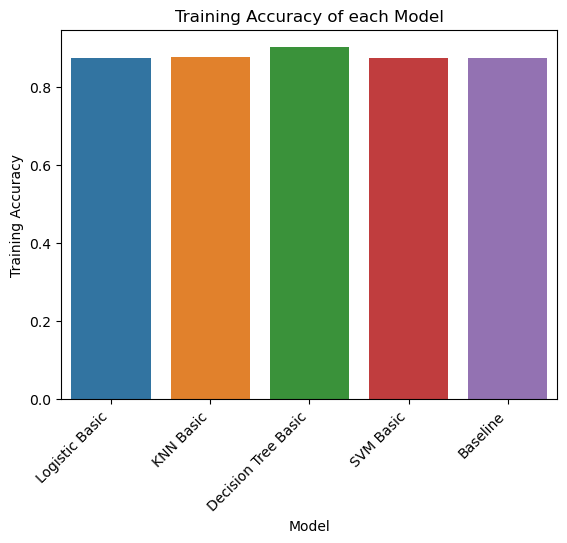

In [25]:
#Plot Training Accuracy of each model on a barplot. Does not appear to be a significant difference now.
fig, ax = plt.subplots()
plot = sns.barplot(data = Comparisondf,x = 'Model', y='Train Accuracy').set(title = 'Training Accuracy of each Model', xlabel = 'Model', ylabel = 'Training Accuracy')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

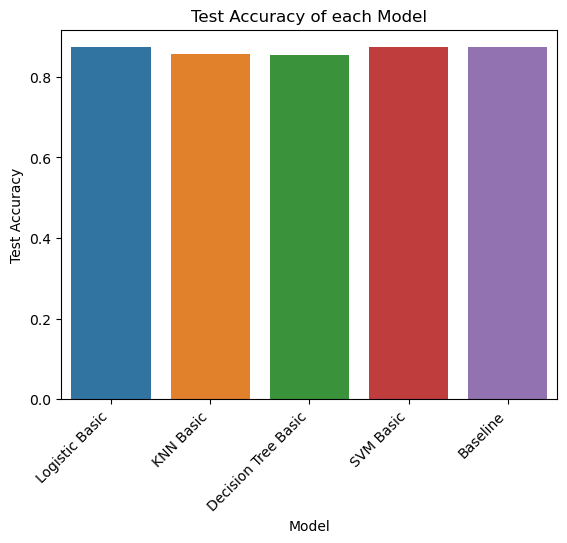

In [26]:
#Plot Test Accuracy of each model on a barplot. Does not appear to be a significant difference now.
fig, ax = plt.subplots()
plot = sns.barplot(data = Comparisondf,x = 'Model', y='Test Accuracy').set(title = 'Test Accuracy of each Model', xlabel = 'Model', ylabel = 'Test Accuracy')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

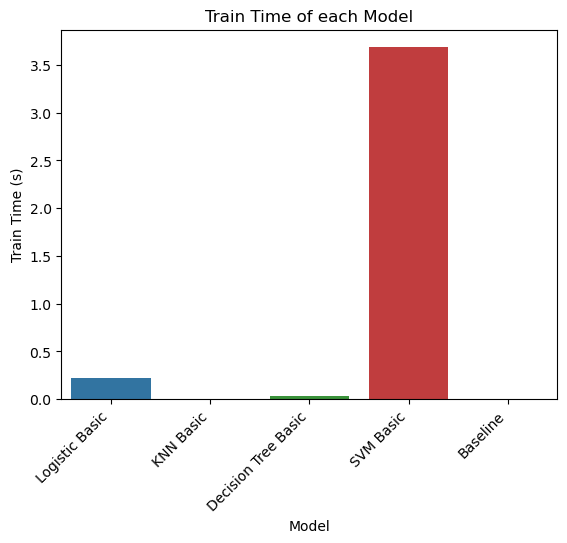

In [27]:
#Plot Train Time of each model on a barplot. Although all are fairly quick, SVM appears to take the longest with the default settings by far.
fig, ax = plt.subplots()
plot = sns.barplot(data = Comparisondf,x = 'Model', y='Train Time').set(title = 'Train Time of each Model', xlabel = 'Model', ylabel = 'Train Time (s)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Logistic Regression

In [199]:
#Find F1 Score function, since this will be a more useful metric than simply accuracy.
#This is because the data is very imbalanced
def F1(actual,predicted):
    matrix = confusion_matrix(actual, predicted)
    TP = matrix[1][1]
    FP = matrix[0][1]
    TN = matrix[0][0]
    FN = matrix[1][0]
    if TP + FP == 0:
        return(0)
    precision = TP / (TP + FP)
    recall =  TP / (TP + FN)
    return((2*recall*precision)/(recall + precision))

In [29]:
#Logistic Model Improvement
#Find best solver.
lrparams = {'solver':['lbfgs','liblinear','newton-cg','sag','saga']}
lrgrid = GridSearchCV(LogisticRegression(max_iter=10000), lrparams).fit(X_train,y_train)

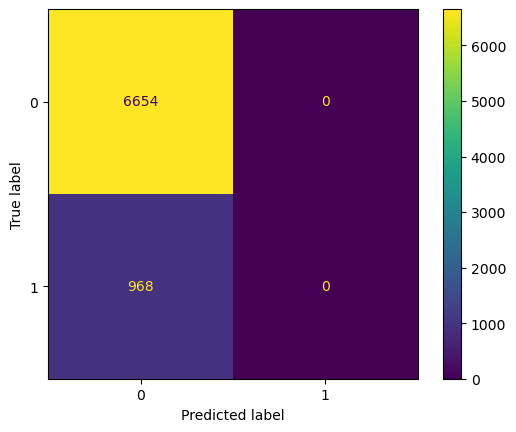

In [30]:
#Visualize using confusion matrix to help assess. Does not appear to be very good, as it performs exactly as the baseline model would.
lrmatrix = confusion_matrix(y_test,lrgrid.predict(X_test))
ConfusionMatrixDisplay(lrmatrix).plot()
plt.show()

In [31]:
matrix = confusion_matrix(y_test, lrgrid.predict(X_test))

In [42]:
#F1 value for lr is n/a because no postive predictions
F1(y_test, lrgrid.predict(X_test))

C:\Users\timmy\AppData\Local\Temp\ipykernel_16460\2889509861.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = TP / (TP + FP)


nan

KNN

In [33]:
#KNN Improvement
knnparams = {'n_neighbors':range(1,11),'weights':['uniform','distance']}
knngrid = GridSearchCV(KNeighborsClassifier(),knnparams).fit(X_train,y_train)

In [34]:
#Get best parameters for KNN
knngrid.best_params_

{'n_neighbors': 8, 'weights': 'uniform'}

In [35]:
#Get average fitting time for KNN
knnbesttime = knngrid.cv_results_['mean_fit_time'].mean()

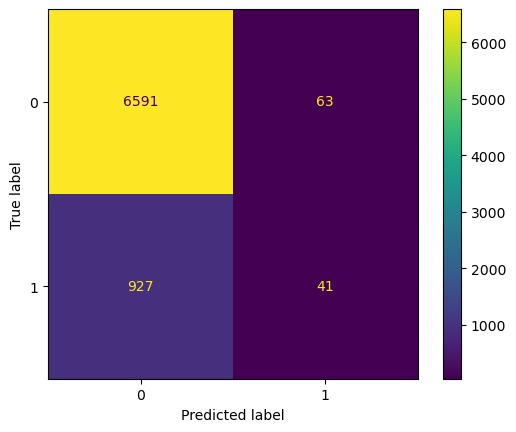

In [36]:
#Visualize using confusion matrix to help assess. Does not appear to be very good, as there are very few correctly predicted positives, and still many false negatives.
knmatrix = confusion_matrix(y_test,knngrid.predict(X_test))
ConfusionMatrixDisplay(knmatrix).plot()
plt.show()

In [37]:
#F1 value for knn is very low.
F1(y_test, knngrid.predict(X_test))

0.07649253731343283

Decision Tree

In [38]:
#Decision Tree Improvement
dtparams = {'criterion':['gini','entropy'],'max_depth':range(1,5),'min_samples_split':range(2,6)}
dtgrid = GridSearchCV(DecisionTreeClassifier(),dtparams).fit(X_train,y_train)

In [39]:
#Get best parameters for KNN
dtgrid.best_params_

{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}

In [40]:
#Get average fitting time for KNN
dtbesttime = dtgrid.cv_results_['mean_fit_time'].mean()

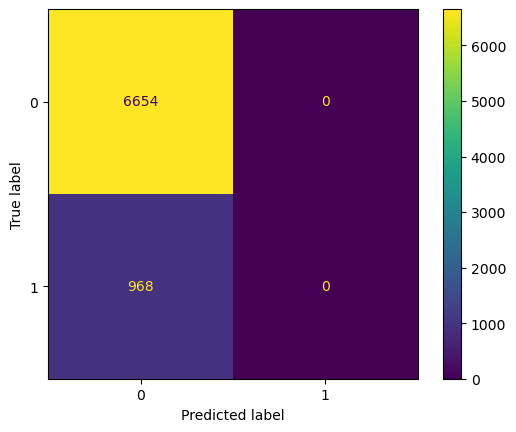

In [41]:
#Visualize using confusion matrix to help assess. Does not appear to be very good, as there are few predicted positives, and still many false negatives.
dtmatrix = confusion_matrix(y_test,dtgrid.predict(X_test))
ConfusionMatrixDisplay(dtmatrix).plot()
plt.show()

In [42]:
#F1 value for knn is n/a because no postive predictions
F1(y_test, dtgrid.predict(X_test))

C:\Users\timmy\AppData\Local\Temp\ipykernel_16460\2889509861.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = TP / (TP + FP)


nan

SVM

In [43]:
#SVM Improvement
sparams = {'kernel':['linear','rbf','sigmoid'],'gamma':['scale','auto']}
sgrid = GridSearchCV(SVC(),sparams)

In [44]:
sgrid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [45]:
#Get best parameters for SVC
sgrid.best_params_

{'gamma': 'auto', 'kernel': 'rbf'}

In [46]:
#Get average fitting time for SVC
sbesttime = sgrid.cv_results_['mean_fit_time'].mean()

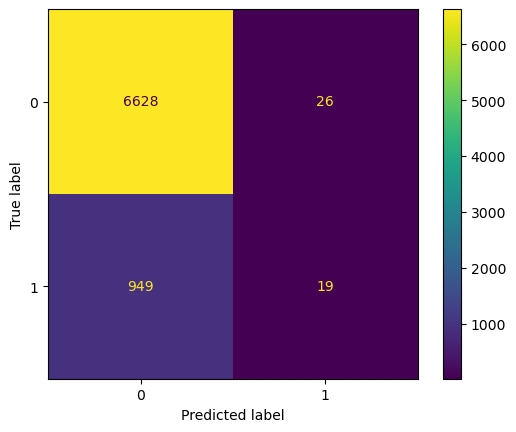

In [47]:
#Visualize using confusion matrix to help assess. Does not appear to be very good, as there are no predicted positives, and still many false negatives.
smatrix = confusion_matrix(y_test,sgrid.predict(X_test))
ConfusionMatrixDisplay(smatrix).plot()
plt.show()

In [48]:
#F1 value for knn is very low.
F1(y_test, sgrid.predict(X_test))

0.03751233958538993

## Improvement Trial 2

Since none of the models appear to be very good, attempt again after adjusting data.

In [96]:
#Clean up unknowns in all of dataframe
for i in df:
    df = df[df[i]!='unknown']


In [224]:
#Encode Contact into dataframe, remove default, housing, loan, education and age as they have little effect.

onehotlist = ['job','contact','month','day_of_week','y']
encoder = OneHotEncoder(drop = 'if_binary')
#Fit and Transform columns and store as variable 'array'
array = encoder.fit_transform(df[onehotlist]).toarray()
#Get feature names of each new column after onehotecoder
names = encoder.get_feature_names_out(onehotlist)
#Make new dataframe using onehotencoder outputs
onehotdone = pd.DataFrame(array)
onehotdone.columns = names

In [135]:
#Reshape education column to use OrdinalEncoder
eduarray = np.array(df['education']).reshape(-1,1)
#Fit and get array of values after OrdinalEncoder
ordinaldone = OrdinalEncoder(categories = [edulist]).fit_transform(eduarray)
#Add education column to onehotencoder transformed data

onehotdone['education'] = ordinaldone

In [174]:
#Add age and campaign numeric values to dataframe
resetdf = df.reset_index()
onehotdone['age'] = resetdf['age']
onehotdone['campaign'] = resetdf['campaign']

Train Test Split of New df

In [225]:
#Train test split of processed dataframe
train, test = train_test_split(onehotdone)
#Split train and test into inputs and outputs as X and y respectively.
X_train = train.drop('y_yes', axis = 1)
y_train = train['y_yes']
X_test = test.drop('y_yes', axis = 1)
y_test = test['y_yes']

In [176]:
def F1test(model):
    return(F1(y_test,model.fit(X_train,y_train).predict(X_test)))


# TEST

In [226]:
#Logistic Model Improvement
#Find best solver.
lrparams = {'solver':['lbfgs','liblinear','newton-cg','sag','saga']}
lrgrid = GridSearchCV(LogisticRegression(max_iter=10000), lrparams).fit(X_train,y_train)

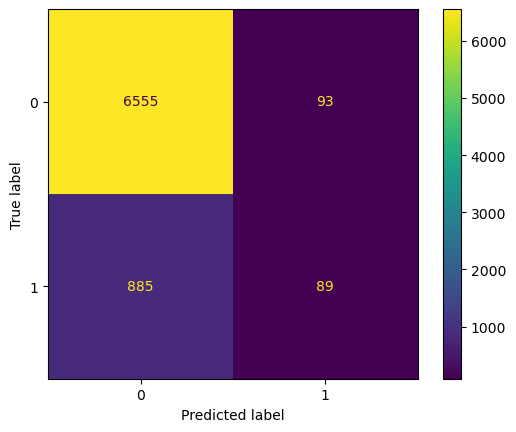

In [227]:
#Visualize using confusion matrix to help assess. Does not appear to be very good, as it performs exactly as the baseline model would.
lrmatrix = confusion_matrix(y_test,lrgrid.predict(X_test))
ConfusionMatrixDisplay(lrmatrix).plot()
plt.show()

In [251]:
#Get average fitting time for lr
lrbesttime = lrgrid.cv_results_['mean_fit_time'].mean()

In [252]:
lrdata = ['Logistic Regression',F1(y_test,lrgrid.predict(X_test)),lrbesttime]
#Invalid F1 score because this model never predicts a positive value.

KNN

In [230]:
#KNN Improvement
knnparams = {'n_neighbors':range(1,11),'weights':['uniform','distance']}
knngrid = GridSearchCV(KNeighborsClassifier(),knnparams).fit(X_train,y_train)

In [231]:
#Get best parameters for KNN
knngrid.best_params_

{'n_neighbors': 8, 'weights': 'uniform'}

In [232]:
#Get average fitting time for KNN
knnbesttime = knngrid.cv_results_['mean_fit_time'].mean()

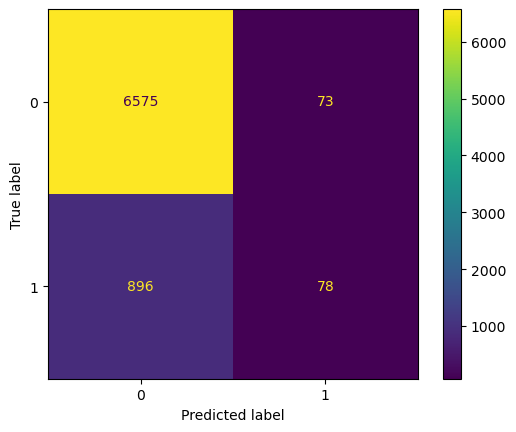

In [233]:
#Visualize using confusion matrix to help assess. Does not appear to be very good, as there are very few correctly predicted positives, and still many false negatives.
knmatrix = confusion_matrix(y_test,knngrid.predict(X_test))
ConfusionMatrixDisplay(knmatrix).plot()
plt.show()

In [250]:
#F1 value for knn is very low.
kdata = ['KNN',F1(y_test, knngrid.predict(X_test)),knnbesttime]

Decision Tree

In [235]:
#Decision Tree Improvement
dtparams = {'criterion':['gini','entropy'],'max_depth':range(1,5),'min_samples_split':range(2,6)}
dtgrid = GridSearchCV(DecisionTreeClassifier(),dtparams).fit(X_train,y_train)

In [236]:
#Get best parameters for KNN
dtgrid.best_params_

{'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 2}

In [237]:
#Get average fitting time for KNN
dtbesttime = dtgrid.cv_results_['mean_fit_time'].mean()

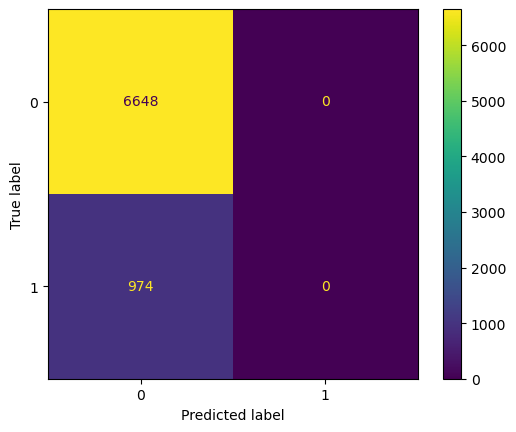

In [238]:
#Visualize using confusion matrix to help assess. Does not appear to be very good, as there are few predicted positives, and still many false negatives.
dtmatrix = confusion_matrix(y_test,dtgrid.predict(X_test))
ConfusionMatrixDisplay(dtmatrix).plot()
plt.show()

In [249]:
#F1 value is low, as few correct predicitons.
dtdata = ['Decision Tree', F1(y_test, dtgrid.predict(X_test)),dtbesttime]

SVM

In [240]:
#SVM Improvement
sparams = {'kernel':['linear','rbf','sigmoid'],'gamma':['scale','auto']}
sgrid = GridSearchCV(SVC(),sparams)

In [241]:
sgrid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [242]:
#Get best parameters for SVC
sgrid.best_params_

{'gamma': 'scale', 'kernel': 'rbf'}

In [243]:
#Get average fitting time for SVC
sbesttime = sgrid.cv_results_['mean_fit_time'].mean()

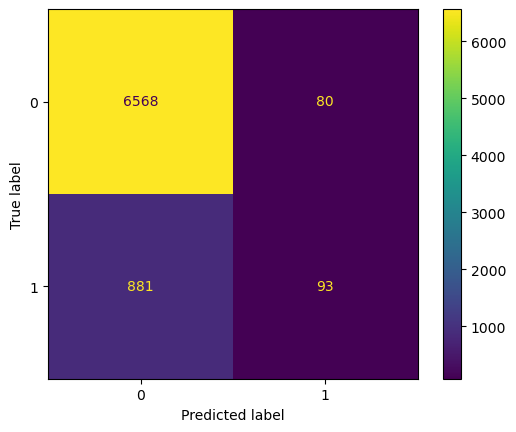

In [244]:
#Visualize using confusion matrix to help assess. Does not appear to be very good, as there are no predicted positives, and still many false negatives.
smatrix = confusion_matrix(y_test,sgrid.predict(X_test))
ConfusionMatrixDisplay(smatrix).plot()
plt.show()

In [248]:
#F1 value is low, as few correct predicitons.
sdata = ['SVC',F1(y_test, sgrid.predict(X_test)),sbesttime]

In [253]:
#Make dataframe of F1 data
ImprovedF1 = pd.DataFrame([lrdata,kdata,dtdata,sdata])
ImprovedF1.columns = ['Model','F1','Time']

<function matplotlib.pyplot.show(close=None, block=None)>

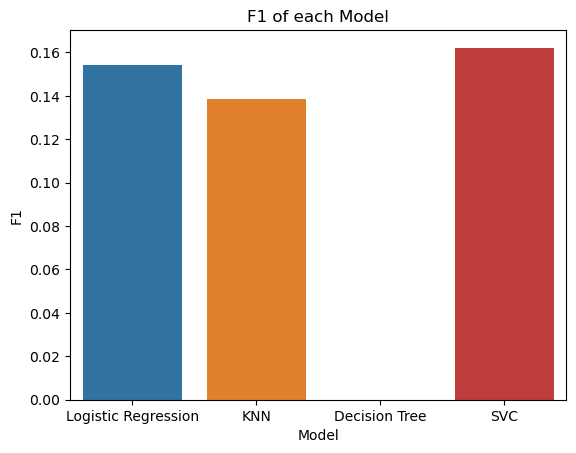

In [258]:
#Plot F1 of each model on a barplot. #Logistic Regression appears to be the best, although all values are fairly low.
fig, ax = plt.subplots()
plot = sns.barplot(data = ImprovedF1,x = 'Model', y='F1').set(title = 'F1 of each Model', xlabel = 'Model', ylabel = 'F1')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

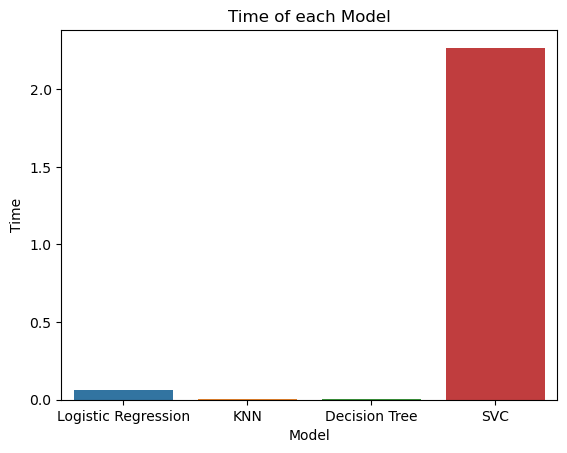

In [259]:
#Plot Time of each model on a barplot. #Logistic Regression appears to be the best, although all values are fairly low.
fig, ax = plt.subplots()
plot = sns.barplot(data = ImprovedF1,x = 'Model', y='Time').set(title = 'Time of each Model', xlabel = 'Model', ylabel = 'Time')
plt.show

In [262]:
#Get coefficients of Logistic Regression and see which values affect prediction
#Logistic Regression is best balance of speed and predictive ability, given my criteria.
value = LogisticRegression(max_iter = 10000).fit(X_train,y_train)
list = []
for i in range(0,len(value.feature_names_in_)):
    list.append([value.feature_names_in_[i],(np.exp(value.coef_[0][i]))])
pd.DataFrame(list).sort_values(1,ascending=False)
  

,0,1
17,month_mar,3.088788
21,month_sep,2.556842
20,month_oct,2.492847
14,month_dec,2.436530
8,job_student,2.255716
5,job_retired,1.984567
10,job_unemployed,1.109889
26,day_of_week_wed,1.100087
25,day_of_week_tue,1.098579
16,month_jun,1.082243


# Findings

Due to the data being heavily skewed towards an output value of "No", meaning that the majority of clients in the dataset did not subscribe to a term deposit, I decided to use F1 as an evaluation metric for how well the models classified entries. I felt it to be important to determine when I used both F1 and time to determine what I thought to be the best model, since time plays a large role when it comes to processing larger datasets. 

Although my final F1 values were still fairly low, I believe the Logistic Regression model performed the best for this dataset, as it had a very close F1 value to the  SVC model (which scored the highest), however the Logistic Regression Model trained far quicker.

As such, I believe that future analysis of the data could focus on Logistic Regression, and further explore permutations of the data, such as exploring whether or not the a client being contacted in a previous campaign mattered, and such. Interestingly, certain features of campaigns such as contacting individuals by telephone instead of cell phone appeared to have a large impact on my model, with those being contacted by telephone being far less likely to subsribe than those contacted by cellphone, and those being contacted in march being far more likely to subscribe than those contacted in november. 